In [35]:
# https://medium.com/dataman-in-ai/explain-your-model-with-the-shap-values-bc36aac4de3d
# https://towardsdatascience.com/deep-learning-model-interpretation-using-shap-a21786e91d16
# https://medium.com/dataman-in-ai/the-shap-with-more-elegant-charts-bc3e73fa1c0c
# https://stackoverflow.com/questions/66814523/shap-deepexplainer-with-tensorflow-2-4-error/66844039#66844039

In [26]:
import os
import shap
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from sklearn.model_selection import KFold, train_test_split
from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
import tensorflow as tf  
from tensorflow.keras.utils import to_categorical
from keras.utils import to_categorical  

import warnings 
warnings.filterwarnings('ignore')

In [27]:
# onehot encoding 
def load_data(target):
    data_path = '/Users/eric/Desktop/NEW_MB_CODE/Raw_DATASET/insurance.csv'
    df = pd.read_csv(data_path, index_col=False)
    y = df.pop(target) 
    X = df[['MakeModel','Mileage','VehicleYear','ThisCarCost']].astype(str)
    X = pd.get_dummies(X)
    X = X.to_numpy()
    print(X)
    encoder = LabelEncoder() 
    y = encoder.fit_transform(y)
    # Convert integers to dummy variables (i.e. one hot encoded)
    y = to_categorical(y)
    return X,y
X, y = load_data('CarValue')
seed = 9
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed )
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = seed )

[[0 1 0 ... 1 0 0]
 [0 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [0 0 1 ... 0 0 0]
 [0 1 0 ... 0 0 0]
 [0 0 1 ... 0 0 0]]


In [21]:
def load_data(target):
    data_path = '/Users/eric/Desktop/NEW_MB_CODE/Raw_DATASET/insurance.csv'
    df = pd.read_csv(data_path, index_col=False)
    y = df.pop(target)
    print(y.value_counts())
    X = df[['MakeModel','Mileage','VehicleYear','ThisCarCost']].astype(str)
    print(X)
    X = X.to_numpy()
    print(X)
    encoder = LabelEncoder() 
    y = encoder.fit_transform(y)
    # Convert integers to dummy variables (i.e. one hot encoded)
    y = to_categorical(y)
    return X,y
X, y = load_data('CarValue')
seed = 9

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed )
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state = seed )


0    888
2    475
1    454
3    174
4      9
Name: CarValue, dtype: int64
      MakeModel  Mileage  VehicleYear  ThisCarCost
0             1        2            1            1
1             2        2            1            0
2             0        3            1            0
3             2        1            1            0
4             1        2            1            1
...         ...      ...          ...          ...
1995          1        0            1            0
1996          1        2            1            0
1997          2        2            1            0
1998          1        2            1            0
1999          2        2            0            0

[2000 rows x 4 columns]
[[1 2 1 1]
 [2 2 1 0]
 [0 3 1 0]
 ...
 [2 2 1 0]
 [1 2 1 0]
 [2 2 0 0]]


Epoch 1/400
5/5 [==============================] - 0s 16ms/step - loss: 1.6193 - accuracy: 0.2047 - val_loss: 1.6049 - val_accuracy: 0.3406
Epoch 2/400
5/5 [==============================] - 0s 4ms/step - loss: 1.6129 - accuracy: 0.3313 - val_loss: 1.5996 - val_accuracy: 0.3656
Epoch 3/400
5/5 [==============================] - 0s 3ms/step - loss: 1.6069 - accuracy: 0.3562 - val_loss: 1.5943 - val_accuracy: 0.3844
Epoch 4/400
5/5 [==============================] - 0s 4ms/step - loss: 1.6013 - accuracy: 0.3305 - val_loss: 1.5893 - val_accuracy: 0.2875
Epoch 5/400
5/5 [==============================] - 0s 3ms/step - loss: 1.5960 - accuracy: 0.2711 - val_loss: 1.5843 - val_accuracy: 0.2625
Epoch 6/400
5/5 [==============================] - 0s 3ms/step - loss: 1.5909 - accuracy: 0.2461 - val_loss: 1.5793 - val_accuracy: 0.1844
Epoch 7/400
5/5 [==============================] - 0s 4ms/step - loss: 1.5859 - accuracy: 0.2211 - val_loss: 1.5742 - val_accuracy: 0.2188
Epoch 8/400
5/5 [=========

5/5 [==============================] - 0s 3ms/step - loss: 1.1938 - accuracy: 0.3828 - val_loss: 1.1717 - val_accuracy: 0.3688
Epoch 60/400
5/5 [==============================] - 0s 3ms/step - loss: 1.1879 - accuracy: 0.3828 - val_loss: 1.1662 - val_accuracy: 0.3688
Epoch 61/400
5/5 [==============================] - 0s 3ms/step - loss: 1.1822 - accuracy: 0.3828 - val_loss: 1.1608 - val_accuracy: 0.3688
Epoch 62/400
5/5 [==============================] - 0s 3ms/step - loss: 1.1767 - accuracy: 0.3820 - val_loss: 1.1554 - val_accuracy: 0.3688
Epoch 63/400
5/5 [==============================] - 0s 3ms/step - loss: 1.1710 - accuracy: 0.3820 - val_loss: 1.1499 - val_accuracy: 0.3688
Epoch 64/400
5/5 [==============================] - 0s 3ms/step - loss: 1.1656 - accuracy: 0.3820 - val_loss: 1.1446 - val_accuracy: 0.3688
Epoch 65/400
5/5 [==============================] - 0s 3ms/step - loss: 1.1602 - accuracy: 0.4203 - val_loss: 1.1390 - val_accuracy: 0.5719
Epoch 66/400
5/5 [===============

5/5 [==============================] - 0s 3ms/step - loss: 0.8475 - accuracy: 0.7344 - val_loss: 0.7867 - val_accuracy: 0.7656
Epoch 118/400
5/5 [==============================] - 0s 3ms/step - loss: 0.8424 - accuracy: 0.7344 - val_loss: 0.7810 - val_accuracy: 0.7656
Epoch 119/400
5/5 [==============================] - 0s 3ms/step - loss: 0.8376 - accuracy: 0.7344 - val_loss: 0.7755 - val_accuracy: 0.7656
Epoch 120/400
5/5 [==============================] - 0s 3ms/step - loss: 0.8326 - accuracy: 0.7344 - val_loss: 0.7700 - val_accuracy: 0.7656
Epoch 121/400
5/5 [==============================] - 0s 3ms/step - loss: 0.8276 - accuracy: 0.7344 - val_loss: 0.7646 - val_accuracy: 0.7656
Epoch 122/400
5/5 [==============================] - 0s 3ms/step - loss: 0.8227 - accuracy: 0.7352 - val_loss: 0.7592 - val_accuracy: 0.7688
Epoch 123/400
5/5 [==============================] - 0s 3ms/step - loss: 0.8179 - accuracy: 0.7352 - val_loss: 0.7536 - val_accuracy: 0.7688
Epoch 124/400
5/5 [========

5/5 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.7672 - val_loss: 0.5875 - val_accuracy: 0.8000
Epoch 176/400
5/5 [==============================] - 0s 3ms/step - loss: 0.6575 - accuracy: 0.7672 - val_loss: 0.5854 - val_accuracy: 0.8000
Epoch 177/400
5/5 [==============================] - 0s 3ms/step - loss: 0.6556 - accuracy: 0.7672 - val_loss: 0.5835 - val_accuracy: 0.8000
Epoch 178/400
5/5 [==============================] - 0s 3ms/step - loss: 0.6540 - accuracy: 0.7672 - val_loss: 0.5818 - val_accuracy: 0.8000
Epoch 179/400
5/5 [==============================] - 0s 3ms/step - loss: 0.6523 - accuracy: 0.7672 - val_loss: 0.5799 - val_accuracy: 0.8000
Epoch 180/400
5/5 [==============================] - 0s 3ms/step - loss: 0.6507 - accuracy: 0.7672 - val_loss: 0.5780 - val_accuracy: 0.8000
Epoch 181/400
5/5 [==============================] - 0s 3ms/step - loss: 0.6491 - accuracy: 0.7672 - val_loss: 0.5765 - val_accuracy: 0.8000
Epoch 182/400
5/5 [========

5/5 [==============================] - 0s 3ms/step - loss: 0.5986 - accuracy: 0.7719 - val_loss: 0.5259 - val_accuracy: 0.7969
Epoch 234/400
5/5 [==============================] - 0s 3ms/step - loss: 0.5980 - accuracy: 0.7719 - val_loss: 0.5251 - val_accuracy: 0.7969
Epoch 235/400
5/5 [==============================] - 0s 3ms/step - loss: 0.5976 - accuracy: 0.7719 - val_loss: 0.5248 - val_accuracy: 0.7969
Epoch 236/400
5/5 [==============================] - 0s 3ms/step - loss: 0.5971 - accuracy: 0.7719 - val_loss: 0.5245 - val_accuracy: 0.7969
Epoch 237/400
5/5 [==============================] - 0s 3ms/step - loss: 0.5963 - accuracy: 0.7719 - val_loss: 0.5237 - val_accuracy: 0.7969
Epoch 238/400
5/5 [==============================] - 0s 3ms/step - loss: 0.5959 - accuracy: 0.7719 - val_loss: 0.5229 - val_accuracy: 0.7969
Epoch 239/400
5/5 [==============================] - 0s 3ms/step - loss: 0.5953 - accuracy: 0.7719 - val_loss: 0.5224 - val_accuracy: 0.7969
Epoch 240/400
5/5 [========

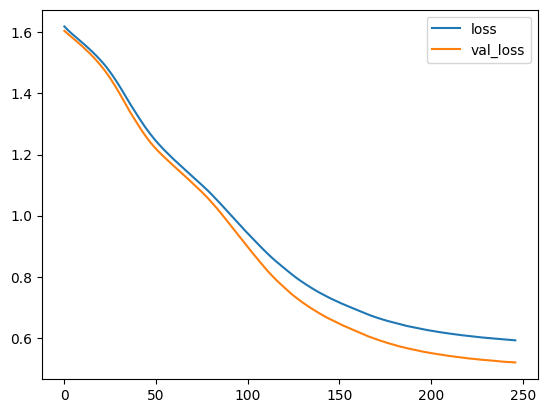

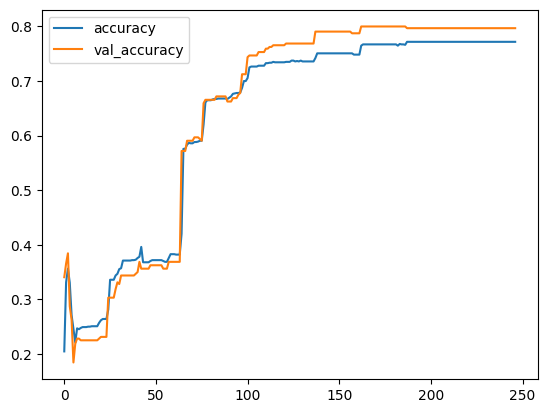

In [28]:
# build mlp
model = Sequential()
model.add(Dense(4, activation="relu", input_dim = X_train.shape[1]))
model.add(Dense(4, activation="relu"))
model.add(Dense(5, activation="softmax") )  # softmax

early_stopping = keras.callbacks.EarlyStopping(
patience= 20,
min_delta= 0.01,
restore_best_weights=True)

# compile model
model.compile(loss= 'categorical_crossentropy', #"binary_crossentropy" "sparse_categorical_crossentropy"
              optimizer = 'adam',  #tf.keras.optimizers.Adam()
              metrics = ['accuracy'])

history = model.fit(X_train, y_train, 
          validation_data = (X_val, y_val),
          epochs = 400, 
          batch_size = 256,
          callbacks = [early_stopping] )

history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot()
history_df.loc[:, ['accuracy', 'val_accuracy']].plot()
loss, accuracy = model.evaluate(X_test, y_test)
print(loss)

print(model.evaluate(X_test, y_test))

print( f"Best Validation Loss: { history_df['val_loss'].min() }" )
print( f"Best Validation Accuracy: { history_df['val_accuracy'].max() }" )

In [4]:
# Compute SHAP values
explainer = shap.DeepExplainer(model, X_train.values)
shap_values = explainer.shap_values(X_test.values)

AttributeError: 'numpy.ndarray' object has no attribute 'values'

In [ ]:
fig = plt.gcf()
shap.summary_plot(shap_values[0], plot_type = 'bar', 
                  feature_names = X_test.columns)
fig.savefig('scratch.pdf', bbox_inches='tight')

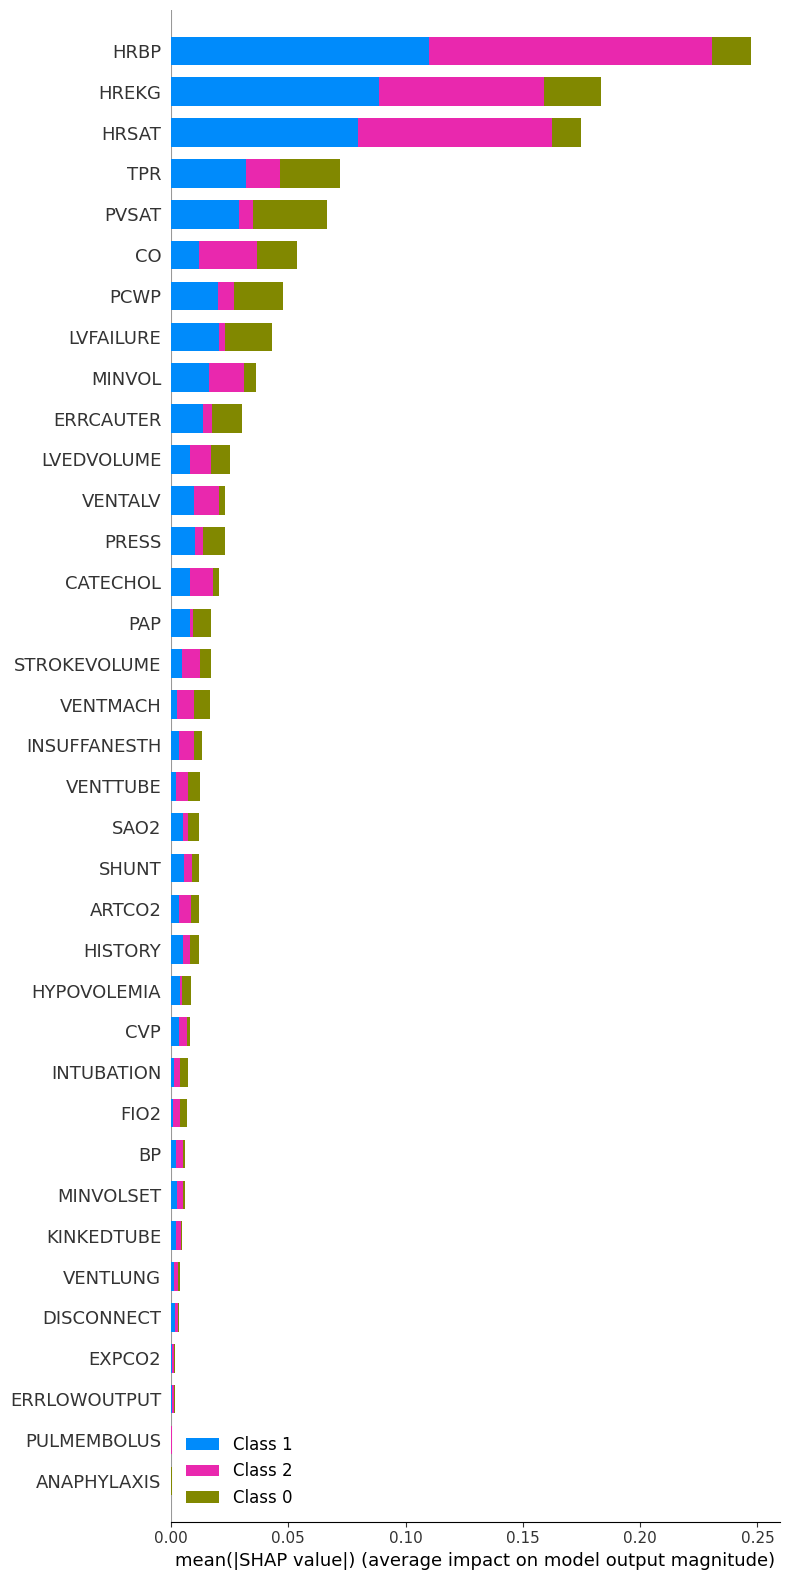

In [6]:
shap.summary_plot(shap_values, X_train, max_display=X_train.shape[1]) 

In [7]:
row_to_show = 5
data_for_prediction = X_test.iloc[row_to_show]  # use 1 row of data here. Could use multiple rows if desired
data_for_prediction_array = data_for_prediction.values.reshape(1, -1)
model.predict(data_for_prediction_array)

1/1 [==============================] - 0s 33ms/step


array([[6.5328546e-05, 2.5975891e-05, 9.9990869e-01]], dtype=float32)

In [8]:
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1][1], 
                features = X_test.columns, show=True, matplotlib=True)

ValueError: setting an array element with a sequence

In [ ]:
shap.decision_plot(explainer.expected_value[0], 
                   shap_values[0][0], features = X_test.iloc[0,:], 
                   feature_names = X_test.columns.tolist())

In [ ]:
shap.plots._waterfall.waterfall_legacy(explainer.expected_value[0],
                                       shap_values[0][0], 
                                       feature_names = X_test.columns)